# CH13 数据可视化（菜品摆放）

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
#让图表直接在Jupyter Notebook中展示出来
%matplotlib inline 
plt.rcParams["font.sans-serif"] = 'SimHei'  #中文乱码问题
plt.rcParams['axes.unicode_minus'] = False   #负号无法显示

In [3]:
%config InlineBackend.figure_format = 'svg'  #设置图表为数量图格式形式

## 13.5建立画布与坐标系

### 13.5.1建立画布

正式建立画布

In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

使用figsize参数来空值画布的宽和高

In [5]:
plt.figure(figsize = (8, 6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

需要注意的是，建立完的画布，不会直接显示出来，只有一串画布信息

### 13.5.2add_subplot建系

绘制一个1×1的坐标系

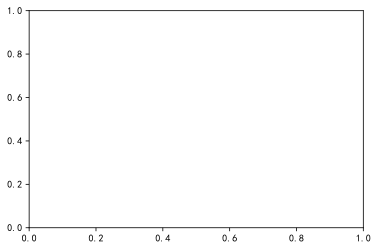

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

绘制一个2×2的坐标系

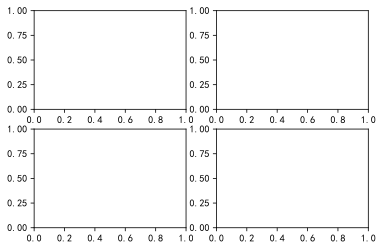

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

### 13.5.3plt.subplot2gird建系

划分为2×2，并在(0,0)位置绘图

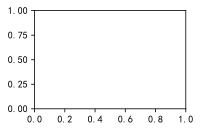

In [8]:
plt.subplot2grid((2,2),(0,0))

使用如上方式作图，具体的绘图代码需跟在建系的语句后面<br>
如下，在(0,0)的位置做折线图，在(0,1)的位置做柱形图

In [10]:
x = np.arange(6)
y = np.arange(6)

<BarContainer object of 6 artists>

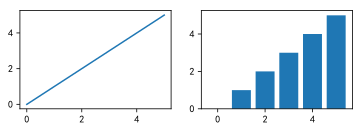

In [13]:
plt.subplot2grid((2,2),(0,0))
plt.plot(x, y)
plt.subplot2grid((2,2),(0,1))
plt.bar(x, y)

### 13.5.4plt.subplot建系

与plt.subplot2grid类似，将画布分成几份，并指明作图绘图区域<br>
如下，在区域1做折线图，在区域4做柱形图

In [14]:
x = np.arange(6)
y = np.arange(6)

<BarContainer object of 6 artists>

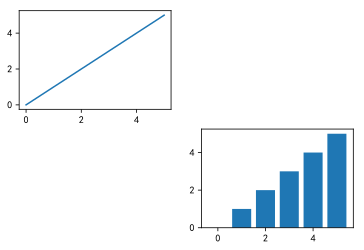

In [15]:
plt.subplot(2,2,1)
plt.plot(x, y)
plt.subplot(2,2,4)
plt.bar(x, y)

### 13.5.5plt.subplots建系

同理，仅是表达方式不同，但subplots函数可以一次返回多个坐标系

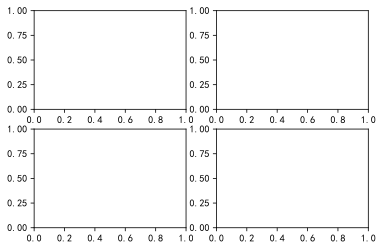

In [16]:
fig, axes = plt.subplots(2,2)

In [17]:
x = np.arange(6)
y = np.arange(6)

<BarContainer object of 6 artists>

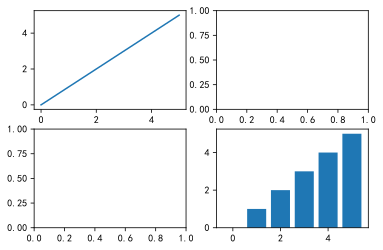

In [19]:
fig, axes = plt.subplots(2,2)
axes[0,0].plot(x, y)
axes[1,1].bar(x, y)

### 13.5.6区别总结

仅有add_subplot属于对象式编程，即所有操作都是针对某个对象进行的，例如：先建一块画布，然后在这块画布上建系，进而在坐标系上画图<br>
后三种属于函数式编程，直接调用plt库里面的某个函数或方法达到目的

## 13.6设置坐标轴

### 13.6.1设置坐标轴的标题

在x轴与y轴的旁边加上标题<br>
并使用labelpad参数，控制xlabel与ylabel分别到x轴与y轴的距离<br>
再使用其他参数控制xlabel的格式（大小，字体颜色，是否加粗等）

Text(0, 0.5, '注册量')

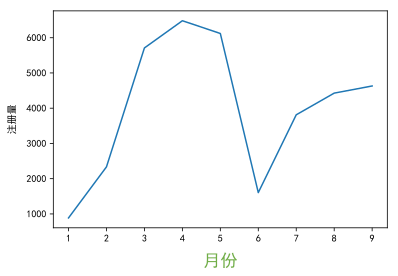

In [21]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([886,2335,5710,6482,6120,1605,3813,4428,4631])
plt.plot(x, y)
plt.xlabel("月份",labelpad = 10, fontsize = "xx-large", color = "#70AD47", fontweight = 'bold')
plt.ylabel("注册量",labelpad = 10)

### 13.6.2设置坐标轴刻度

x与y轴默认显示的是x/y的值，可以自定义显示不同刻度处的值，具体使用xticks于ysticks方法

([<matplotlib.axis.YTick at 0x1b9985d86a0>,
 <a list of 6 Text yticklabel objects>)

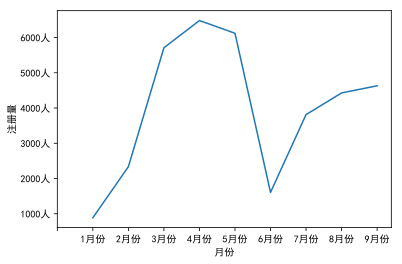

In [44]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([886,2335,5710,6482,6120,1605,3813,4428,4631])
plt.plot(x, y)
plt.xlabel("月份")
plt.ylabel("注册量")
plt.xticks(np.arange(10), ["","1月份","2月份","3月份","4月份","5月份","6月份","7月份","8月份","9月份"])
plt.yticks(np.arange(1000,7000,1000), ["1000人","2000人","3000人","4000人","5000人","6000人"])

如果为了数据安全，也可以不显示x/y轴具体的值，直接给xticks与yticks传入空列表就可以隐藏

([], <a list of 0 Text yticklabel objects>)

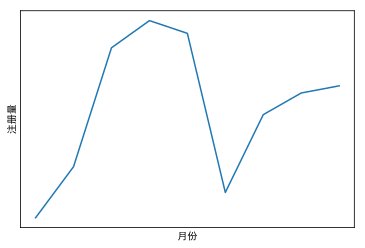

In [38]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([886,2335,5710,6482,6120,1605,3813,4428,4631])
plt.plot(x, y)
plt.xlabel("月份")
plt.ylabel("注册量")
plt.xticks([])
plt.yticks([])

除了xticks与yticks之外，plt库中的tick_params方法也可以对刻度线进行设置，具体见如下：<br>
axis：对哪个轴的刻度线进行设置，有x、y、both三个可选<br>
reset：是否重置所有设置，有True、False可选<br>
which：对那种刻度进行设置，有major(主刻度线)、minior(次刻度线)、both三个可选<br>
direction：刻度的朝向，in(朝里)、out(朝外)、inout(里外均有)三个可选<br>
length：刻度线长度<br>
width：刻度线的宽度<br>
color：刻度线的颜色<br>
pad：刻度线与刻度标签之间的距离<br>
labelsize：刻度标签大小<br>
labelcolor：刻度标签的颜色<br>
top、bottom、left、right：True/False可选，控制上、下、左、右刻度线是否显示<br>
labeltop、labelbottom、labelleft、labelright：True/False可选，控制上、下、左、右刻度标签是否显示<br>

In [39]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([886,2335,5710,6482,6120,1605,3813,4428,4631])

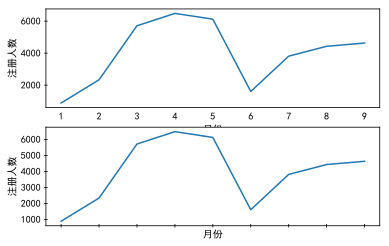

In [40]:
#在2X1坐标系上的第一个坐标系中绘图
plt.subplot(2,1,1)
plt.plot(x, y)
plt.xlabel("月份")
plt.ylabel("注册人数")
#轴刻度线设置双向且下刻度线不显示
plt.tick_params(axis = "both", which = "both", direction = "inout" ,bottom = False)
#在2X1坐标系上的第二个坐标系中绘图
plt.subplot(2,1,2)
plt.plot(x, y)
plt.xlabel("月份")
plt.ylabel("注册人数")
plt.yticks(np.arange(1000,7000,1000), ["1000","2000","3000","4000","5000","6000"])
#轴刻度线设置双向且下刻度标签不显示
plt.tick_params(axis = "both", which = "both", direction = "inout", labelbottom = False)

### 13.6.3设置坐标轴的范围

也可以使用xlim与ylim对坐标轴的最大值与最小值进行设置

(0, 8000)

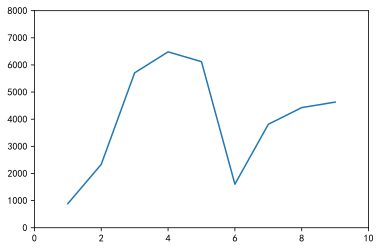

In [47]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([886,2335,5710,6482,6120,1605,3813,4428,4631])
plt.plot(x, y)
plt.xlim(0,10)
plt.ylim(0,8000)

### 13.6.4坐标轴的轴显示设置

有时候为了美观，会把不要显示的轴关闭，可以通过如下方法

(0.6, 9.4, 606.2, 6761.8)

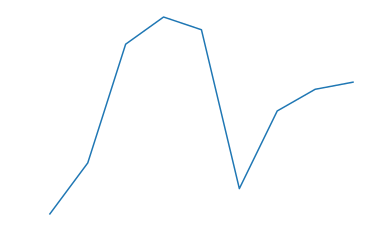

In [51]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([886,2335,5710,6482,6120,1605,3813,4428,4631])
plt.plot(x, y)
plt.axis("off")

## 13.7其他图表格式设置

### 13.7.1网络线设置

网络线是相比于坐标轴更小的单位，默认是关闭的，可以通过修改参数b的值

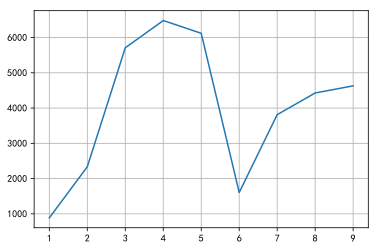

In [53]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([886,2335,5710,6482,6120,1605,3813,4428,4631])
plt.plot(x, y)
plt.grid(b = True)

也可以使用axis参数来决定，具体打开哪个轴的网络线

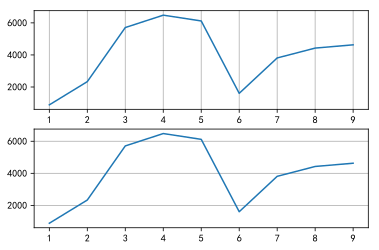

In [56]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([886,2335,5710,6482,6120,1605,3813,4428,4631])
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
plt.plot(x, y)
plt.grid(b = True, axis = "x")
ax2 = fig.add_subplot(2,1,2)
plt.plot(x, y)
plt.grid(b = True, axis = "y")

网络线也是属于线的一种，可以设置其线宽（linewidth）、线型（linestyle）

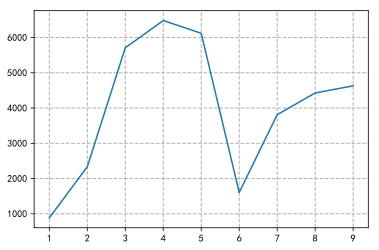

In [59]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([886,2335,5710,6482,6120,1605,3813,4428,4631])
plt.plot(x, y)
plt.grid(b = True, linestyle = 'dashed', linewidth = 1)

### 13.7.2设置图例

图例对图表有注释的作用，在绘图的时候，通过给label参数传入值表示该图表的图例名<br>
再通过plt.legend()方法将图例展示出来

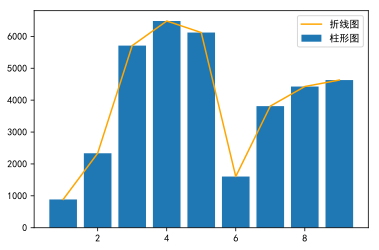

In [61]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([886,2335,5710,6482,6120,1605,3813,4428,4631])
plt.plot(x, y, label = "折线图", color = "orange")
plt.bar(x, y, label = "柱形图")
plt.legend()

也可通过loc参数来调整图例的位置，具体见如下<br>
best：根据图表区域自动选择最合适的展示位置(loc = 0)<br>
upper right：图例显示在右上角(loc = 1)<br>
upper left：图例显示在左上角(loc = 2)<br>
lower left：图例显示在左下角(loc = 3)<br>
lower right：图例显示在右下角(loc = 4)<br>
right：图例显示在右侧(loc = 5)<br>
center left：图例显示在左侧中心位置(loc = 6)<br>
center right：图例显示在右侧中心位置(loc = 7)<br>
lower center：图例显示在底部中心位置(loc = 8)<br>
upper center：图例显示在顶部中心位置(loc = 9)<br>
center：图例显示在正中心位置(loc = 10)<br>

两种表达方式都可以

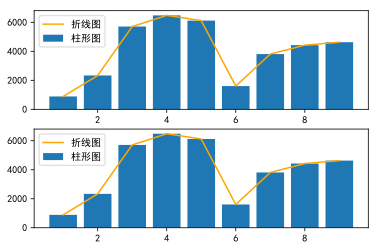

In [63]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([886,2335,5710,6482,6120,1605,3813,4428,4631])
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
plt.plot(x, y, label = "折线图", color = "orange")
plt.bar(x, y, label = "柱形图")
plt.legend(loc = "upper left")
ax2 = fig.add_subplot(2,1,2)
plt.plot(x, y, label = "折线图", color = "orange")
plt.bar(x, y, label = "柱形图")
plt.legend(loc = 2)

还有一些其他参数可以设置，具体见如下，<br>
fontsize：图例字号大小<br>
prop：关于文本相关设置，以字段的形式传给参数prop<br>
facecolor：图例框的背景颜色<br>
edgecolor：图例框的边框颜色<br>
title：图例标题<br>
title_fontsize：图例标题大小<br>
shadow：是否给图例框添加阴影，默认为False<br>

### 13.7.3图表标题设置

图表的标题是用来说明整张表的核心思想，通过如下方式设置

同样通过loc的值来修改标题的显示位置，默认剧中，有如下三个参数可选<br>
center：居中显示<br>
left：靠左显示<br>
right：靠右显示<br>

Text(0.0, 1.0, '1-9月份公司注册用户数')

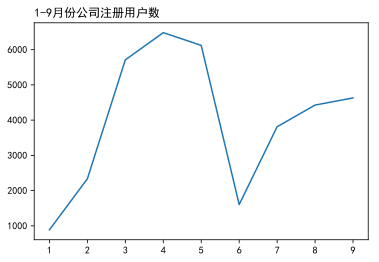

In [65]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([886,2335,5710,6482,6120,1605,3813,4428,4631])
plt.plot(x, y)
plt.title('1-9月份公司注册用户数', loc = "left")

### 13.7.4设置数据标签

显示标签的意思就是在对应位置上显示数值，可直接用text函数实现，具体参数见如下，<br>
参数(x、y)：分别表示可以在哪里显示数据<br>
str：表示显示的具体数值<br>
horizontalalignment：简称ha,表示str在水平方向的位置，有center、left、right三个值可选<br>
verticalalignment：简称va,表示str在垂直方向的位置，有center、top、bottom三个值可选<br>
fontsize：设置str字体大小<br>

Text(5, 1605, '极值点')

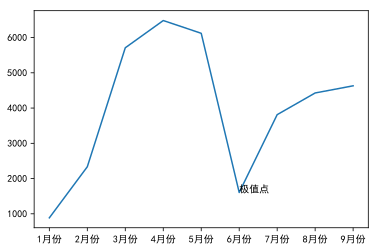

In [75]:
x = np.array(["1月份","2月份","3月份","4月份","5月份","6月份","7月份","8月份","9月份"])
y = np.array([886,2335,5710,6482,6120,1605,3813,4428,4631])
plt.plot(x, y)
plt.text(5,1605, "极值点")

当然，如果需要显示图表中的所有值，可以使用for循环进行遍历

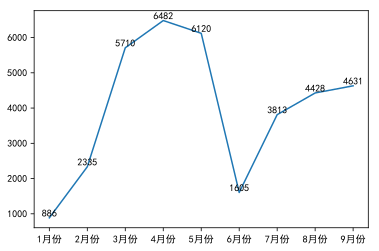

In [76]:
x = np.array(["1月份","2月份","3月份","4月份","5月份","6月份","7月份","8月份","9月份"])
y = np.array([886,2335,5710,6482,6120,1605,3813,4428,4631])
plt.plot(x, y)
for a,b in zip(x, y):
    plt.text(a,b,b, ha = "center", va = "bottom", fontsize = 10)

### 13.7.5图表注释

与标签的作用类似，都是为了便于让读者更快地获取图表信息，具体参数件如下，<br>
s：表示要注释的文本内容<br>
xy：表示要注释的位置<br>
xytext：表示要注释的文本的显示位置<br>
arrowprops：设置箭相关参数、颜色、箭类型设置<br>

Text(6, 1605, '服务器宕机了')

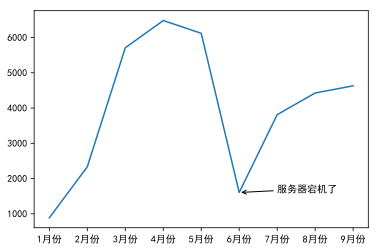

In [77]:
x = np.array(["1月份","2月份","3月份","4月份","5月份","6月份","7月份","8月份","9月份"])
y = np.array([886,2335,5710,6482,6120,1605,3813,4428,4631])
plt.plot(x, y)
plt.annotate("服务器宕机了", xy = (5,1605), xytext = (6,1605), arrowprops = dict(facecolor = "black", arrowstyle = "->")) 

### 13.7.6数据表

数据表就是在图表的基础上在添加一个表格，使用plt库中的table函数<br>
具体参数见如下，<br>
cellText：数据表内的值<br>
cellColours：数据表的颜色<br>
cellLoc：数据表中数值的位置，可选left、right、center<br>
cellWidths：列宽<br>
rowLabels：行标签<br>
rowColours：行标签颜色<br>
rowLoc：行标签位置<br>
colLabels：列标签<br>
colColours：列标签颜色<br>
colLoc：列标签位置<br>
loc：整个数据表的位置，可选坐标系上、下、左、右

([], <a list of 0 Text xticklabel objects>)

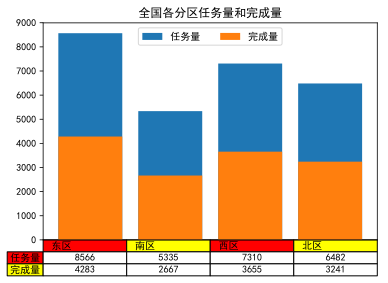

In [88]:
x = np.array(["东区","南区","西区","北区"])
y1 = np.array([8566,5335,7310,6482])
y2 =  np.array([4283,2667,3655,3241])
plt.bar(x, y1, label = "任务量")
plt.bar(x, y2, label = "完成量")
plt.legend(loc ="upper center",ncol =2)

cellText = np.array([[8566,5335,7310,6482]
                    ,[4283,2667,3655,3241]])
rows = ["任务量","完成量"]
colmns = (["东区","南区","西区","北区"])
plt.table(cellText = cellText, cellLoc = "center",
         rowLabels= rows, rowColours=["red","yellow"],
         rowLoc="center", colLabels= x, colColours=["red","yellow","red","yellow"],
         colLoc="left", loc="nottom")
plt.title("全国各分区任务量和完成量")
plt.xticks([])

## 13.8绘制常用图表

### 13.8.1绘制折线图

plt.plot(x, y, color, linestyle, linewidth, marker, markeredgecolor, markeredgwidth, markerfacecolor, markersize, label)<br>
x、y分别代表x与y轴的数据（必须项）<br>
color代表折线图颜色；linewidth表示线的宽度<br>
marker表示每个点的标记物形状<br>

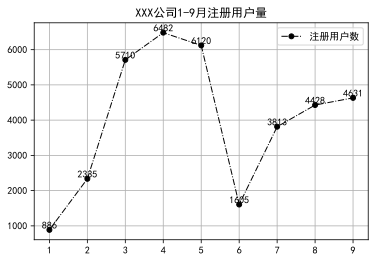

In [97]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([886,2335,5710,6482,6120,1605,3813,4428,4631])
#绘制折线图
plt.plot(x, y,color = "k",linestyle = "dashdot", linewidth = 1, marker = "o", markersize = 5, label = "注册用户数")
#增加标题
plt.title("XXX公司1-9月注册用户量", loc = "center")
#添加数据标签
for a, b in zip(x, y):
    plt.text(a,b,b, ha = 'center', va = "bottom", fontsize = 10)
plt.grid(True) #网络线
plt.legend() #显示图例
plt.savefig("E:/plot.jpg")

### 13.8.2绘制柱形图

plt.bar(x, height, width, bottom, align = 'center', color, edgecolor)

普通柱状图

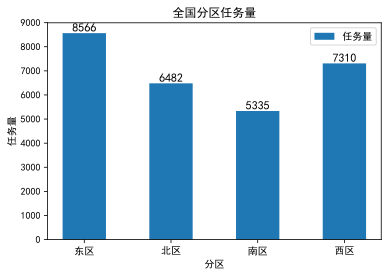

In [100]:
x = np.array(["东区","北区","南区","西区"])
y = np.array([8566,6482,5335,7310])

#绘制柱状图
plt.bar(x, y, width = 0.5, align = "center", label = "任务量")

#设置标题
plt.title("全国分区任务量", loc="center")

#添加数据标签
for a,b in zip(x, y):
    plt.text(a,b,b,ha = "center", va = "bottom", fontsize = 12)

#设置x和y轴的名称
plt.xlabel("分区")
plt.ylabel("任务量")

#显示图例
plt.legend()

#保存到本地
plt.savefig("E:/bar.jpg")

双柱状图

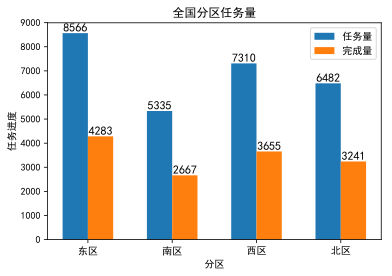

In [113]:
x = np.array([1,2,3,4])
y1 = np.array([8566,5335,7310,6482])
y2 = np.array([4283,2667,3655,3241])

#绘制柱状图
plt.bar(x, y1, width = 0.3, label = "任务量")
plt.bar(x + 0.3, y2, width = 0.3, label = "完成量")

#设置标题
plt.title("全国分区任务量", loc="center")

#添加数据标签
for a,b in zip(x, y1):
    plt.text(a,b,b,ha = "center", va = "bottom", fontsize = 12)

for a,b in zip(x + 0.3, y2):
    plt.text(a,b,b,ha = "center", va = "bottom", fontsize = 12)

#设置x轴刻度
plt.xticks(x+0.15, ["东区","南区","西区","北区"])    

#设置x和y轴的名称
plt.xlabel("分区")
plt.ylabel("任务进度")

#显示图例
plt.legend()

#保存到本地
plt.savefig("E:/bar.jpg")

堆叠图

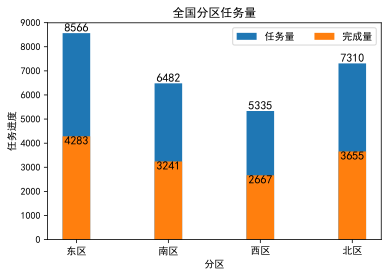

In [117]:
x = np.array([1,2,3,4])
y1 = np.array([8566,6482,5335,7310])
y2 = np.array([4283,3241,2667,3655])

#绘制柱状图
plt.bar(x, y1, width = 0.3, label = "任务量")
plt.bar(x, y2, width = 0.3, label = "完成量")

#设置标题
plt.title("全国分区任务量", loc="center")

#添加数据标签
for a,b in zip(x, y1):
    plt.text(a,b,b,ha = "center", va = "bottom", fontsize = 12)

for a,b in zip(x, y2):
    plt.text(a,b,b,ha = "center", va = "top", fontsize = 12)

#设置x轴刻度
plt.xticks(x, ["东区","南区","西区","北区"])    

#设置x和y轴的名称
plt.xlabel("分区")
plt.ylabel("任务进度")

#显示图例
plt.legend(ncol = 2)

#保存到本地
plt.savefig("E:/bar.jpg")

### 13.8.3绘制条形图

与柱形图相似，仅是将x与y轴进行转置

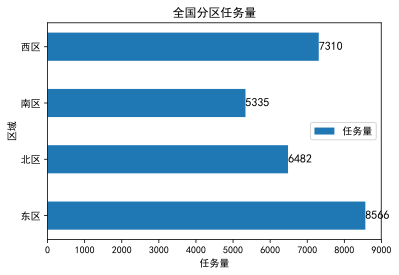

In [126]:
x = np.array(["东区","北区","南区","西区"])
y = np.array([8566,6482,5335,7310])

#绘制柱状图
plt.barh(x, width = y, height = 0.5, align = "center", label = "任务量")

#设置标题
plt.title("全国分区任务量", loc="center")

#添加数据标签
for a,b in zip(x, y):
    plt.text(b,a,b,ha = "left", va = "center", fontsize = 12)

#设置x和y轴的名称
plt.ylabel("区域")
plt.xlabel("任务量")

#显示图例
plt.legend()

#保存到本地
# plt.savefig("E:/bar.jpg")

### 13.8.4绘制散点图

plt.scatter(x, y, s, c, marker, linewidths, edgecolors)<br>
x,y：表示散点的位置<br>
s：表示每个点的面积,即散点的大小.如果是一个具体的值时,则是由的点大小都一样.也可以呈现多个值,让每个点的大小都不一样,这时候就成了气泡图了<br>
c：表示每个点的颜色,如果做只有一种颜色时,则所有的点颜色相同,也可以呈现多哦颜色值,让不同的颜色不同<br>
marker：表示每个点的标记和折线图的中的marker一致<br>
linewidths：表示每个散点的宽度<br>
edgecolors：表示每个散点轮廓的颜色<br>

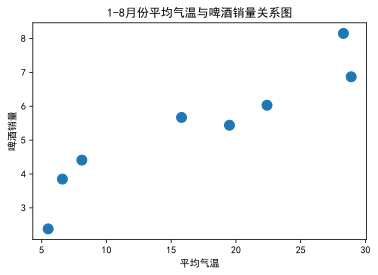

In [139]:
x = np.array([5.5, 6.6, 8.1, 15.8, 19.5, 22.4, 28.3, 28.9])
y = np.array([2.38, 3.85, 4.41, 5.67, 5.44, 6.03, 8.15, 6.87])

#绘制散点图
plt.scatter(x, y, marker = "o", s = 100)

#设置标题
plt.title("1-8月份平均气温与啤酒销量关系图", loc = "center")

#设置x和y轴名称
plt.xlabel("平均气温")
plt.ylabel("啤酒销量")

#保存到本地
plt.savefig("E:/scatter.jpg")

### 13.8.5绘制气泡图

如之前所提及，气泡图于散点图类似，仅是各点的大小不同

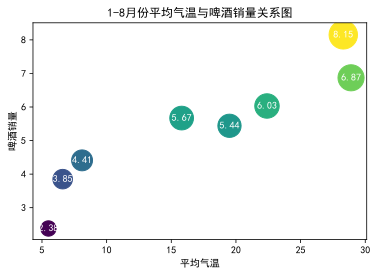

In [7]:
x = np.array([5.5, 6.6, 8.1, 15.8, 19.5, 22.4, 28.3, 28.9])
y = np.array([2.38, 3.85, 4.41, 5.67, 5.44, 6.03, 8.15, 6.87])

colors = y*10
area = y*100

#绘制气泡图
plt.scatter(x,y, c = colors,marker = "o", s = area)

#设置标题
plt.title("1-8月份平均气温与啤酒销量关系图", loc = "center")

#添加数据标签
for a,b in zip(x,y):
    plt.text(a, b, b, ha = "center", va = "center", fontsize = 10, color = "white")

#设置x和y轴名称
plt.xlabel("平均气温")
plt.ylabel("啤酒销量")

#保存到本地
plt.savefig("E:/scatter.jpg")

### 13.8.6绘制面积图

plt.stackplot(x, y, labels, colors)，其展现与折线图类似，参数见如下，<br>
x,y：表示x和y坐标数值<br>
labels：不同系列图标的图例名<br>
colors：不同系列图标的颜色<br>

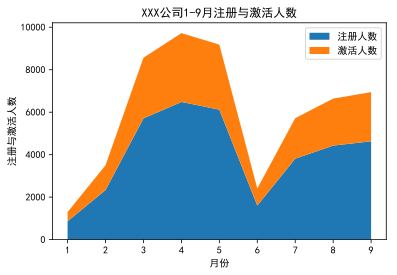

In [9]:
x = np.array([1,2,3,4,5,6,7,8,9])
y1 = np.array([866,2335,5710,6482,6120,1605,3813,4428,4631])
y2 = np.array([433,1167,2855,3241,3060,802,1906,2214,2315])

#绘制面积图
labels =["注册人数","激活人数"] 
plt.stackplot(x, y1, y2, labels = labels)

#设置标题
plt.title("XXX公司1-9月注册与激活人数",loc ="center")

#设置x和y轴的名称
plt.xlabel("月份")
plt.ylabel("注册与激活人数")

#设置图例
plt.legend()

#保存到本地
plt.savefig("E:/stackplot.jpg")

### 13.8.7绘制树形图

squarify.plot(size, label, color, value, edgecolor, linewidth)，用于展示不同类别的占比关系，参数见如下，<br>
sizes：待绘图数据<br>
label：不同列别的图例标签<br>
color：不同列别的颜色<br>
value：不同列别的数据标签<br>
edgecolor：不同列别之间边框的颜色<br>
linewidth：边框线宽<br>

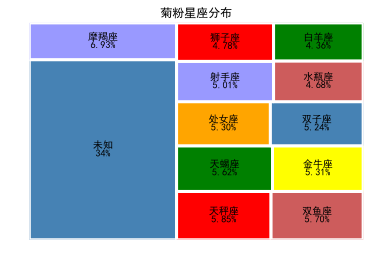

In [10]:
import squarify

#指定每一块的大小
size = np.array([3.4,0.693,0.585,0.570,0.562,0.531,0.530,0.524,0.501,0.478,0.468,0.436])

#指定每一块标签文字
xingzuo = np.array(["未知","摩羯座","天秤座","双鱼座","天蝎座","金牛座","处女座","双子座","射手座","狮子座","水瓶座","白羊座"])

#指定每一块数值标签
rate = np.array(["34%","6.93%","5.85%","5.70%","5.62%","5.31%","5.30%","5.24%","5.01%","4.78%","4.68%","4.36%"])

#指定每一块的颜色
colors = ["steelblue","#9999ff","red","indianred","green","yellow","orange"]

#绘制树形图
plot = squarify.plot(sizes = size, label = xingzuo, color = colors, value = rate, edgecolor = 'white', linewidth = 3)

#设置标题
plt.title("菊粉星座分布", fontdict = {'fontsize':12})

#去除坐标轴
plt.axis('off')

#去除上边框和右边框的刻度
plt.tick_params(top = False,right = False)

#保存到本地
plt.savefig("E:/squarify.jpg")

### 13.8.8雷达图

plt.polar(theta, r, color, marker, linewidth)，雷达图可以更直观地看出事物的优势与不足，先将各点展示在极坐标系中，然后用线将各点连接起来，具体参数如下见如下，<br>
theta：每一点在极坐标系中的角度<br>
r：每一点在极坐标系中的半径<br>
color：连接各点之间线的颜色<br>
marker：每点的标记物<br>
linewidth：连接线的宽度<br>

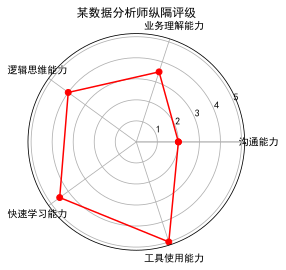

In [11]:
dataLenth = 5 #把圆分成5份

#np.linspace表示在指定的间隔内返回均匀间隔的数字
angles = np.linspace(0,2*np.pi, dataLenth, endpoint = False)
labels = ["沟通能力","业务理解能力","逻辑思维能力","快速学习能力","工具使用能力"]
data = [2,3.5,4,4.5,5]
data = np.concatenate((data,[data[0]])) #闭合
angles = np.concatenate((angles,[angles[0]])) #闭合

#绘图
plt.polar(angles,data,color='r',marker="o")

#设置x轴宽度
plt.xticks(angles, labels)

#设置标题
plt.title("某数据分析师纵隔评级")

#保存本地
plt.savefig("E:/polarplot.jpg")

### 13.8.9绘制箱型图

plt.boxplot(x,vert,widths,labels)，用来反映一组数据的离散情况，具体参数如下见如下，<br>
x：待绘图源数据<br>
vert：箱形图方向,如果为True则表示纵向；如果是False则表示横向，默认为True<br>
widths：箱形图的宽度<br>
labels：箱形图的标签<br>

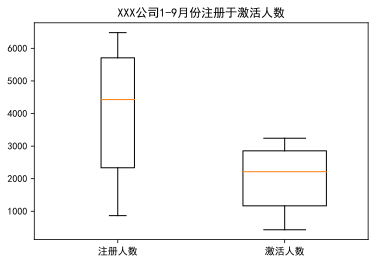

In [12]:
y1 = np.array([866,2335,5710,6482,6120,1605,3813,4428,4631])
y2 = np.array([433,1167,2855,3241,3060,802,1906,2214,2315])
x = [y1,y2]

#绘图
labels = ["注册人数","激活人数"]
plt.boxplot(x, labels = labels, vert = True, widths = [0.2,0.5])

#设置标题
plt.title("XXX公司1-9月份注册于激活人数", loc = "center")

#保存到本地
plt.savefig("E:/boxplot.jpg")

### 13.8.10绘制饼图

plt.pie(x, explode, labels, colors, autopct, pctdistance, shadow, labeldistance, startangle, radius, counterclock, wedgeprops, textprops, center, frame)，常用来表示一等级中不同类别的占比情况，具体参数如下，<br>
x：待绘图的数据<br>
explode：饼图中每一块离心圆的距离<br>
labels：饼图中每一块的标签 color 饼图中每一块的颜色<br>
autopct：控制饼图内数值百分比的格式<br>
pactdistanc：数据标签距中心的距离<br>
shadow：饼图是否有阴影<br>
labeldistance：每一块饼图距离中心的距离<br> 
startangle：饼图初始角度<br>
radius：饼图的半径 <br>
counterclock 是否让饼图逆时针显示<br>
wedgeprops：饼图内外边缘属性<br>
textprops：饼图中文本相关属性<br>
center：饼图中心位置<br>
frame：是否显示饼图背后的图框<br>

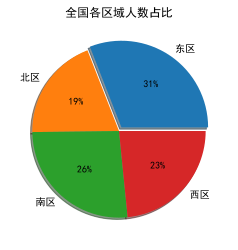

In [15]:
x = np.array([8566,5335,7310,6482])

labels = ["东区","北区","南区","西区"]

#让第一块离圆心远点
explode = [0.05,0,0,0]
labeldistance = 1.1

#绘制饼图
plt.pie(x, labels = labels, autopct = '%.0f%%', shadow = True, explode = explode, 
        radius = 1.0, labeldistance = labeldistance)

#设置标题
plt.title("全国各区域人数占比", loc = "center")

#保存图表到本地
plt.savefig("E:/pie.jpg")

### 13.8.11绘制圆环图

与饼图类似，但需要调整参数wedgeprops

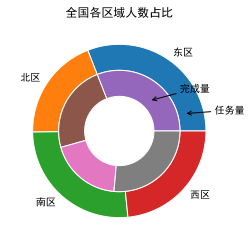

In [16]:
x1 = np.array([8566,5335,7310,6482])
x2 = np.array([4283,3241,2667,3655])

labels = ["东区","北区","南区","西区"]

#绘制圆环图
plt.pie(x1, labels = labels, radius = 1.0, wedgeprops = dict(width = 0.3, edgecolor = "w"))
plt.pie(x2, radius = 0.7, wedgeprops = dict(width = 0.3, edgecolor = "w"))

#添加注释
plt.annotate("完成量", xy = (0.35,0.35), xytext = (0.7,0.45), arrowprops = dict(facecolor = "black", arrowstyle = "->"))
plt.annotate("任务量", xy = (0.75,0.20), xytext = (1.1,0.2), arrowprops = dict(facecolor = "black", arrowstyle = "->"))

#设置标题
plt.title("全国各区域人数占比", loc = "center")

#保存图表到本地
plt.savefig("E:/pie01.jpg")

### 13.8.12绘制热力图

plt.imshow(x,cmap)，将某一事物的响应度反映在图表上，可以快速发现需要重点关注的区域，具体参数如下，<br>
x：表示待绘图的数据，需要矩阵形式<br>
cmap：配色方案，用来避阿明图表渐变的主题色<br>
另外，cmap的所有可选值都是封装在plt.cm里面<br>

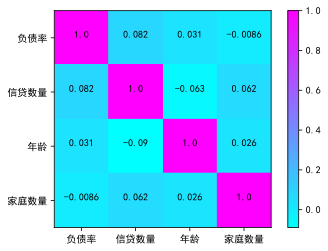

In [20]:
import itertools
cm = np.array([[1,0.082,0.031,-0.0086],
              [0.082,1,-0.063,0.062],
              [0.031,-0.09,1,0.026],
              [-0.0086,0.062,0.026,1]])
cmap = plt.cm.cool #设置配色方案
plt.imshow(cm,cmap = cmap)
plt.colorbar()#显示右边颜色条

#设置x和y周的刻度标签
classes = ["负债率","信贷数量","年龄","家庭数量"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes)
plt.yticks(tick_marks,classes)

#将数值显示在指定位置
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment="center")

#保存图表到本地
plt.savefig("E:/imshow.jpg")

### 13.8.13绘制水平线与垂直线

plt.axhline(y,xmin,xmax)<br>
plt.axvline(x,ymin,ymax)<br>
主要用作对比参，使用plt库中的axhline和axvline方法具体参数如下，<br>
x/y：画水平/垂直线上和的横纵坐标 xmin/xmax 水平线起点和终点<br>
ymin/ymax：垂直线起点和终点<br>

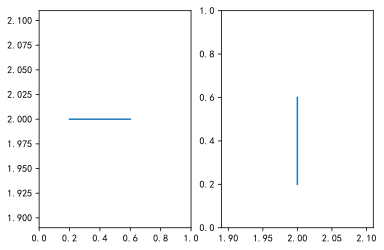

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
#绘制一条y等于2且起点是0.2，终点是0.6的水平线
plt.axhline(y = 2, xmin = 0.2, xmax = 0.6)

ax2 = fig.add_subplot(1,2,2)
#绘制一条x等于2且起点是0.2终点是0.6的垂直线
plt.axvline(x = 2, ymin = 0.2, ymax = 0.6)


## 13.9绘制组合图表

### 13.9.1折线图+折线图

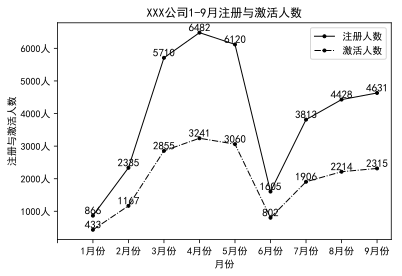

In [5]:
x = np.array([1,2,3,4,5,6,7,8,9])
y1 = np.array([866,2335,5710,6482,6120,1605,3813,4428,4631])
y2 = np.array([433,1167,2855,3241,3060,802,1906,2214,2315])

#绘制双折线绘图
plt.plot(x, y1, color = "k", linestyle = "solid", linewidth = 1, marker = "o", markersize = 3, label = "注册人数")
plt.plot(x, y2, color = "k", linestyle = "dashdot", linewidth = 1, marker = "o", markersize = 3, label = "激活人数")


#设置标题
plt.title("XXX公司1-9月注册与激活人数",loc = "center")

#添加数据标签
for a,b in zip(x,y1):
    plt.text(a, b, b, ha = "center", va = "bottom", fontsize = 11)
    
for a,b in zip(x,y2):
    plt.text(a, b, b, ha = "center", va = "bottom", fontsize = 11)    

#设置x和y轴的名称
plt.xlabel("月份")
plt.ylabel("注册与激活人数")


#设置x和y轴的刻度
plt.xticks(np.arange(10),["","1月份","2月份","3月份","4月份","5月份","6月份","7月份","8月份","9月份"])
plt.yticks(np.arange(1000,7000,1000),["1000人","2000人","3000人","4000人","5000人","6000人"])


#设置图例
plt.legend()

#保存图片到本地
plt.savefig("E:/plot02.jpg") 

### 13.9.2折线图+柱状图

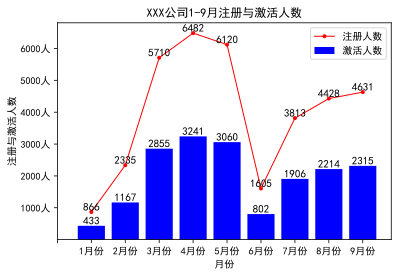

In [7]:
x = np.array([1,2,3,4,5,6,7,8,9])
y1 = np.array([866,2335,5710,6482,6120,1605,3813,4428,4631])
y2 = np.array([433,1167,2855,3241,3060,802,1906,2214,2315])

#绘制折线图与柱状图
plt.plot(x,y1,color = "r", linestyle = "solid", linewidth = 1, marker = "o", markersize = 3, label = "注册人数")
plt.bar(x,y2,color = "b", label = "激活人数")

#设置标题及位置
plt.title("XXX公司1-9月注册与激活人数",loc ="center")

#添加数据标签
for a,b in zip(x,y1):
    plt.text(a,b,b,ha="center",va="bottom",fontsize=11)
    
for a,b in zip(x,y2):
    plt.text(a,b,b,ha="center",va="bottom",fontsize=11)    

#设置x和y轴的名称
plt.xlabel("月份")
plt.ylabel("注册与激活人数")


#设置x和y轴的刻度
plt.xticks(np.arange(10),["","1月份","2月份","3月份","4月份","5月份","6月份","7月份","8月份","9月份"])
plt.yticks(np.arange(1000,7000,1000),["1000人","2000人","3000人","4000人","5000人","6000人"])

#设置图例
plt.legend()

#保存图片到本地
plt.savefig("E:/bar02.jpg")

## 13.10绘制双坐标轴图形

### 13.10.1双y轴图表

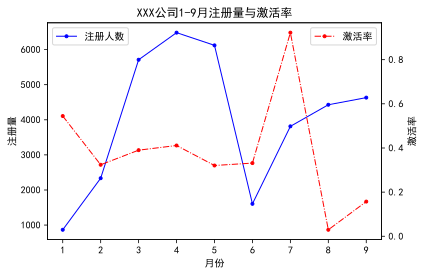

In [9]:
x = np.array([1,2,3,4,5,6,7,8,9])
y1 = np.array([866,2335,5710,6482,6120,1605,3813,4428,4631])
y2 = np.array([0.54459448,0.32392354,0.39002751,
              0.41121879,0.32063077,0.33152276,
              0.92226226,0.02950071,0.15716906])

#绘制主坐标轴上的图表
plt.plot(x, y1, color = "b", linestyle = "solid", linewidth = 1, marker = "o", markersize = 3, label = "注册人数")

#设置主x和y轴的名称
plt.xlabel("月份")
plt.ylabel("注册量")

#设置主坐标的图例
plt.legend(loc = "upper left")

#调用twinx方法
plt.twinx()

#绘制次坐标轴的图表
plt.plot(x,y2,color = "r",linestyle = "dashdot", linewidth = 1, marker = "o", markersize = 3, label = "激活率")

#设置次x和y轴的名称
plt.xlabel("月份")
plt.ylabel("激活率")

#设置次坐标轴的图例
plt.legend()

#设置标题及位置
plt.title("XXX公司1-9月注册量与激活率",loc = "center")

#保存图片到本地
plt.savefig("E:/twinx.jpg")

### 13.10.2双x轴图表

同样使用twiny方法，操作与双y轴类似

## 13.11绘图样式设置

matplotlib库默认样式不是很好看，使用plt.style.available即可查看matplotlib库支持的所有样式

In [10]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

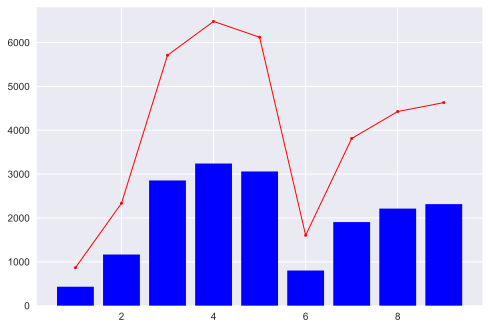

In [13]:
x = np.array([1,2,3,4,5,6,7,8,9])
y1 = np.array([866,2335,5710,6482,6120,1605,3813,4428,4631])
y2 = np.array([433,1167,2855,3241,3060,802,1906,2214,2315])
plt.plot(x, y1, color="r", linestyle = "solid", linewidth = 1, marker = "o", markersize = 3, label = "注册人数")
plt.bar(x, y2, color="b", label = "激活人数")
plt.style.use("seaborn-bright")